# SVMs with additional Feature Engineered Columns

We add here columns created by the feature engineering notebook and compare the accuracy of the models with before. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
import matplotlib.colors as colors
import matplotlib.cm as cmx
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

from Notebook_helpers import load_data
from Notebook_helpers.modeling_helpers import *

%matplotlib inline

## Read in the data + Preprocess

In [ ]:
df, train, val, test = load_data.load_coral_data(complete=True, CV=False, convert_to_categorical=True)

#### Prepare data with additional engineered features

In [4]:
# isolate the predictors and labels for both the training and test set
train_X, train_y, pred_names = load_data.get_features_and_response(train, with_feature_eng = False)
val_X, val_y, _ = load_data.get_features_and_response(val, with_feature_eng = False)
train_plus_val_X, train_plus_val_y, _ = load_data.get_features_and_response(train.append(val), with_feature_eng = False)

In [5]:
print("Features Used: " , pred_names.get_values())

Features Used:  ['Effluent' 'Sedimentation' 'New_Development' 'Habitat_Modification'
 'Invasive_Algae' 'Fishing_Comm_Total' 'Fishing_NonComm_Boat_Total'
 'Fishing_NonComm_Shore_Line' 'Fishing_NonComm_Shore_Net'
 'Fishing_NonComm_Shore_Spear' 'SST_CLIM_M' 'SST_STD' 'CHL_CLIM_M'
 'CHL_ANOM_F' 'PAR_CLIM_M' 'PAR_STD' 'WAV_CLIM_M' 'WAV_ANOM_F'
 'Complexity' 'Depth']


#### Standardize the data

In [6]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_plus_val_X.values)

# Apply transform to both the training set and the test set.
train_X = scaler.transform(train_X.values)
val_X = scaler.transform(val_X.values)
train_plus_val_X = scaler.transform(train_plus_val_X.values)

## Gaussian Kernel

In [6]:
# svclassifier_gauss = SVC(kernel='rbf')  
# svclassifier_gauss.fit(train_X, train_y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
hyperparameters = dict()
clf = GridSearchCV(SVC(kernel='rbf', gamma='auto'), 
                   hyperparameters, cv=5, verbose=0, iid=False,
                   scoring=make_scorer(metrics.f1_score, average='micro', greater_is_better=True),
                   return_train_score=True)
best_model = clf.fit(train_plus_val_X, train_plus_val_y)
best_model.cv_results_

{'mean_fit_time': array([0.00766997]),
 'std_fit_time': array([0.00111824]),
 'mean_score_time': array([0.00271082]),
 'std_score_time': array([0.00078689]),
 'params': [{}],
 'split0_test_score': array([0.66336634]),
 'split1_test_score': array([0.6]),
 'split2_test_score': array([0.64646465]),
 'split3_test_score': array([0.64285714]),
 'split4_test_score': array([0.70408163]),
 'mean_test_score': array([0.65135395]),
 'std_test_score': array([0.03363877]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([0.79746835]),
 'split1_train_score': array([0.80555556]),
 'split2_train_score': array([0.78589421]),
 'split3_train_score': array([0.79648241]),
 'split4_train_score': array([0.77135678]),
 'mean_train_score': array([0.79135146]),
 'std_train_score': array([0.0117904])}

In [10]:
val_pred_svm_gauss = svclassifier_gauss.predict(val_X)  

NameError: name 'svclassifier_gauss' is not defined

#### Evaluate performance

Misclassified samples: 32
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.73      0.73        26
           2       0.75      0.75      0.75        28
           3       0.62      0.72      0.67        25
           5       0.59      0.48      0.53        21

   micro avg       0.68      0.68      0.68       100
   macro avg       0.67      0.67      0.67       100
weighted avg       0.68      0.68      0.68       100



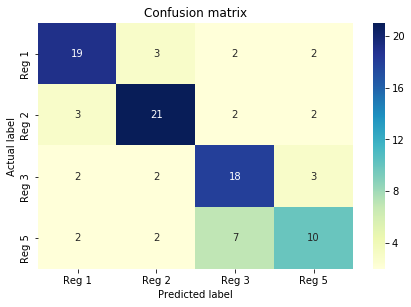

In [8]:
evaluate_performance(val_y, val_pred_svm_gauss)

## Polynomial Kernel

In [9]:
svclassifier_poly = SVC(kernel='poly')  
svclassifier_poly.fit(train_X, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
hyperparameters = dict()
clf = GridSearchCV(SVC(kernel='poly', gamma='auto'), 
                   hyperparameters, cv=5, verbose=0, iid=False,
                   scoring=make_scorer(metrics.f1_score, average='micro', greater_is_better=True),
                   return_train_score=True)
best_model = clf.fit(train_plus_val_X, train_plus_val_y)
best_model.cv_results_

{'mean_fit_time': array([0.00678101]),
 'std_fit_time': array([0.00131173]),
 'mean_score_time': array([0.00196157]),
 'std_score_time': array([0.000296]),
 'params': [{}],
 'split0_test_score': array([0.66336634]),
 'split1_test_score': array([0.53]),
 'split2_test_score': array([0.62626263]),
 'split3_test_score': array([0.62244898]),
 'split4_test_score': array([0.62244898]),
 'mean_test_score': array([0.61290538]),
 'std_test_score': array([0.04422711]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([0.81265823]),
 'split1_train_score': array([0.77272727]),
 'split2_train_score': array([0.77078086]),
 'split3_train_score': array([0.75376884]),
 'split4_train_score': array([0.77386935]),
 'mean_train_score': array([0.77676091]),
 'std_train_score': array([0.01937857])}

In [10]:
val_pred_svm_poly = svclassifier_poly.predict(val_X)  

Misclassified samples: 33
Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.54      0.64        26
           2       0.65      0.79      0.71        28
           3       0.63      0.76      0.69        25
           5       0.67      0.57      0.62        21

   micro avg       0.67      0.67      0.67       100
   macro avg       0.68      0.66      0.66       100
weighted avg       0.68      0.67      0.67       100



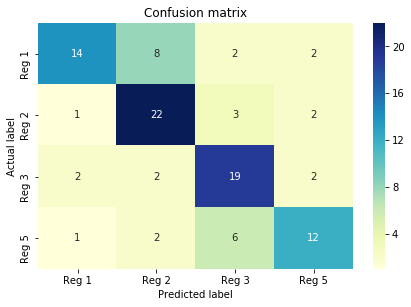

In [11]:
evaluate_performance(val_y, val_pred_svm_poly)

### Try removing a couple columns. 